In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import numpy as np

font_size = 22.5
colwidth = 9.12103352 # for figsize width
mm_to_pt = 1/25.4*72
linewidth = 1.6141975081451896 * mm_to_pt # mm


col_red = '#C00A35'
col_gold = '#FFCD00'
col_orange = '#F3965E'
col_plum = '#AA1555'
col_green = '#24A793'
col_title = '#000000'

plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams.update({'figure.autolayout': True})

np.random.seed(42)
golden = (1 + 5 ** 0.5) / 2

# Plot heatmaps for each channel
sampling_rate = 2048

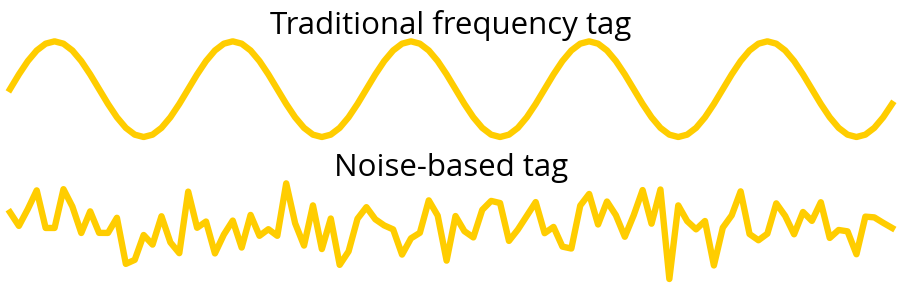

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm

font_size = 22.5
colwidth = 9.12103352
mm_to_pt = 1/25.4*72
linewidth = 1.6141975081451896 * mm_to_pt # mm

col_gold = '#ffcd00'
# Ensure Open Sans font is available
# font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# open_sans = [path for path in font_path if 'OpenSans-Regular.ttf' in path]
# prop = fm.FontProperties(fname=open_sans[0])

# if open_sans:
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams.update({'figure.autolayout': True})
    # plt.rcParams['font.family'] = prop.get_family()
# else:
#     print("Open Sans font not found. Using default font.")

# plt.figure(figsize=(9.12103352, 8))
# Create figure and axes
fig, ax = plt.subplots(2, 1, figsize=(colwidth, 3), gridspec_kw={'height_ratios': [1, 1]})

# Plot EEG response for traditional flickering stimuli
t = np.arange(0, 100, 1)
flicker_response = 0.5 * (1 + 0.5 * np.sin(2 * np.pi * 5 * t / 100))
ax[0].plot(t, flicker_response, label='Visible Flicker', color=col_gold, linewidth=linewidth, clip_on=False)
ax[0].set_title('Traditional frequency tag', fontsize=font_size)
ax[0].axis('off')
ax[0].margins(0)

# Plot EEG response for noise-based tagging
np.random.seed(42)
noise_response = np.random.normal(0, 1, 100)
ax[1].plot(t, noise_response, label='High-Frequency Noise', color=col_gold, linewidth=linewidth, clip_on=False)
ax[1].set_title('Noise-based tag', fontsize=font_size)
ax[1].axis('off')
ax[1].margins(0)

plt.subplots_adjust(left=0, right=1,
                    # top=1, bottom=0
                    # hspace=.3
                    )
plt.tight_layout()

# Title and layout adjustments
# plt.suptitle('Comparison of Traditional and Noise-Based Tagging in BCIs', fontsize=14)
plt.savefig('../presentations/figures/tagging_comparison.svg', bbox_inches=None, pad_inches=None, transparent=True)
plt.show()


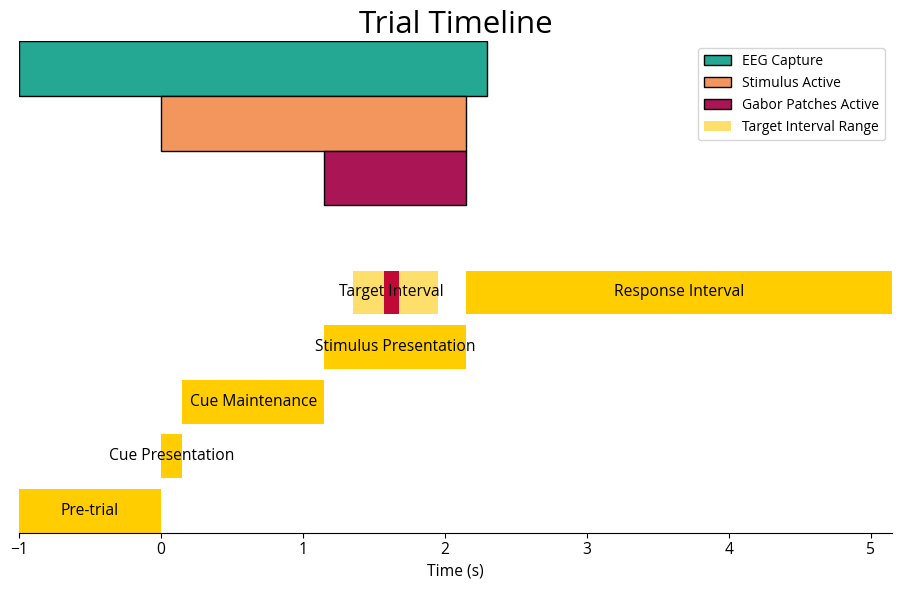

In [20]:
#| label: fig-experiment-timeline
#| fig-cap: "Timeline of the experiment showing the different phases of a trial."
#| fig-alt: "Timeline of the experiment showing the different phases of a trial."

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

col_orange = '#F3965E'
col_plum = '#AA1555'
col_green = '#24A793'
col_red = '#C00A35'
# col_title = '#3b3b3b'
col_title = '#000000'

def create_trial_timeline():
    # Constants based on the experiment code
    cue_duration = 0.15
    stim_delay = 1.0
    stim_duration = 1.0
    target_duration = 0.1
    response_duration = 3.0

    # Time calculations
    pre_trial_start = -1.0
    cue_onset = 0.0
    cue_offset = cue_onset + cue_duration
    stim_onset = cue_offset + stim_delay
    stim_offset = stim_onset + stim_duration
    target_onset_min = stim_onset + 0.2
    target_onset_max = stim_onset + 0.8
    np.random.seed(42)
    target_onset = stim_onset + np.random.uniform(0.2, 0.8)
    target_offset = target_onset + target_duration
    response_allowance = stim_offset + response_duration
    end_time = response_allowance + 0

    # Define phases
    phases = [
        ('Pre-trial', pre_trial_start, cue_onset),
        ('Cue Presentation', cue_onset, cue_offset),
        ('Cue Maintenance', cue_offset, stim_onset),
        ('Stimulus Presentation', stim_onset, stim_offset),
        # ('Target Interval', target_onset, target_offset),
        ('Response Interval', stim_offset, response_allowance)
    ]

    fig, ax = plt.subplots(figsize=(colwidth, 6), clip_on=False)

    # Add overarching bars
    ax.add_patch(patches.Rectangle((pre_trial_start, 4.0),    2.3 - pre_trial_start, 0.5, facecolor=col_green,  edgecolor=col_title, label='EEG Capture'))
    ax.add_patch(patches.Rectangle((cue_onset,       3.5), stim_offset -  cue_onset, 0.5, facecolor=col_orange, edgecolor=col_title, label='Stimulus Active'))
    ax.add_patch(patches.Rectangle((stim_onset,      3.0), stim_offset - stim_onset, 0.5, facecolor=col_plum,  edgecolor=col_title, label='Gabor Patches Active'))

    # Plot phases
    for idx, (label, start, end) in enumerate(phases):
        ax.broken_barh([(start, end - start)], (idx * 0.5, 0.4), facecolors=(col_gold))
        ax.text((start + end) / 2, idx * 0.5 + 0.2, label, ha='center', va='center', color='black', fontsize=font_size/2)


    # Add the target interval range as a shaded area
    ax.add_patch(patches.Rectangle((target_onset_min, 2.0), target_onset_max - target_onset_min, 0.4, facecolor='#fedf6b', alpha=1, label='Target Interval Range'))

    # Add the actual target interval
    ax.broken_barh([(target_onset, target_duration)], (2.0, 0.4), facecolors=(col_red))
    ax.text(target_onset + target_duration / 2, 2.0 + 0.2, 'Target Interval', ha='center', va='center', color='black', fontsize=font_size*.5)

    # Add legend
    ax.legend(loc='upper right')

    # Set labels and title
    ax.set_yticks([])
    ax.set_xlabel('Time (s)', fontsize=font_size/2, color=col_title)
    ax.set_xlim(pre_trial_start, end_time)
    ax.tick_params(axis='x', labelsize=font_size/2)
    ax.set_title('Trial Timeline', fontsize=font_size, color=col_title)
    ax.spines[['right', 'left', 'top']].set_visible(False)
    ax.margins(0)
    plt.subplots_adjust(left=0, right=1,
                        #top=1, bottom=0
                        )

    plt.savefig('../presentations/figures/trial_timeline.svg', bbox_inches=None, pad_inches=None, transparent=True)
    plt.show()

# Call the function to create the plot
create_trial_timeline()


In [21]:
from concurrent.futures import ProcessPoolExecutor, as_completed

import h5py
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.signal import (butter, correlate, filtfilt, find_peaks, resample,
                          sosfiltfilt, welch)

trial = 'A2'
eeg_filepath = f'../data/{trial}/converted/eeg_matrix.mat'
eeg_trialinfo = f'../data/{trial}/converted/trialinfo_matrix_{trial}_cleanedtrials.mat'
eeg_raw_data = f'../data/{trial}/experimental/data.mat'
eeg_labels_path = f'../data/A0/preprocessing/channel_labels.mat' # always get the labels from A0
f = sio.loadmat(eeg_labels_path)
labels = f['channellabels_ADSselection']

def load_mat_file(filepath):
    """ Load a MATLAB .mat file and return its content. """
    try:
        mat_contents = sio.loadmat(filepath)
        return mat_contents
    except NotImplementedError:
        # If the file is v7.3, it will need h5py to handle it
        with h5py.File(filepath, 'r') as file:
            return {key: np.array(value) for key, value in file.items()}

def get_eeg_data(eeg_data_path):
    """ Extract EEG data from the .mat file. """
    data = load_mat_file(eeg_data_path)
    eeg_data = data['data_eeg']
    return eeg_data

def get_trial_info(trial_info_path):
    """ Extract trial information from the .mat file. """
    data = load_mat_file(trial_info_path)
    trial_info = data['all_info']
    return trial_info

def load_raw_data(noise_data_path):
    """ Load and return the entire noise stimuli structure from the .mat file. """
    mat_contents = load_mat_file(noise_data_path)
    # Extract the 'noise_stims' from the nested structure
    noise_stims = mat_contents['data'][0, 0]
    return noise_stims

def get_specific_raw_data(idx, eeg_raw_data, block_index, trial_index):
    """ Fetch the specific noise stimulus for the given block, trial, and channel (0 for left, 1 for right). """
    idxs = ['reaction_times', 'reaction_err', 'answers', 'base_delay', 'target_timings', 'flicker_sides', 'attend_sides', 'orients_L', 'orients_R', 'angle_magnitude', 'probe_sides', 'missed', 'targets_binary', 'tagging_types', 'noise_stims', 'p_num', 'date']
    return eeg_raw_data[idxs.index(idx)][block_index, trial_index]

def trial_number_to_indices(trial_number):
    """ Convert trial number to block and trial indices, zero-indexed. """
    trial_number = int(trial_number) - 1
    block_index = trial_number // 32 + 1 # +1 block because we've discard the first block
    trial_index = trial_number  % 32
    return block_index, trial_index

def load_and_process_data(eeg_filepath, trialinfo_filepath, raw_data_filepath):
    eeg_data = get_eeg_data(eeg_filepath)
    trial_info = get_trial_info(trialinfo_filepath)
    eeg_raw_data = load_raw_data(raw_data_filepath)

    processed_trials = []
    # Assuming we loop over actual trial data, adjust as necessary
    for trial, eeg_data in zip(trial_info, eeg_data):
        block_index, trial_index = trial_number_to_indices(trial[14])

        # Access the corresponding noise stimulus for left and right channels
        noise_stim_left, noise_stim_right = get_specific_raw_data('noise_stims', eeg_raw_data, block_index, trial_index)

        trial_data = {
            'eeg': eeg_data,  # Adjust for zero-index and skip block 1
            'trial_info': trial,
            'reaction_time_1': trial[2],
            'reaction_time_2': get_specific_raw_data('reaction_times', eeg_raw_data, block_index, trial_index),
            'has_noise': bool(int(trial[13])),
            'has_56|64': int(trial[7]) == 0,
            'has_56|60': int(trial[7]) == 1,
            'attended_side': trial[8],
            'noise_stim_left': noise_stim_left,
            'noise_stim_right': noise_stim_right,
            'base_delay': trial[6],
            'target_timings': trial[5],
        }
        processed_trials.append(trial_data)

    return processed_trials

experiment_data = load_and_process_data(eeg_filepath, eeg_trialinfo, eeg_raw_data)
experiment_data = pd.DataFrame(experiment_data)
# These are in the form trials (440), samples (6758), channels (37)
eeg_data = np.stack(experiment_data['eeg'])
channel_labels = load_mat_file(eeg_labels_path)['channellabels_ADSselection'].flatten()
channel_labels = [x[0] for x in channel_labels][:-4] # remove the last 4 channels, they're not used (EXG1 EXG2 EXG3 EXG4)
print(' '.join(channel_labels))


Fp1 AF7 AF3 F1 F3 F5 F7 FT7 FC5 FC3 FC1 C1 C3 C5 T7 TP7 CP5 CP3 CP1 P1 P3 P5 P7 PO7 PO3 O1 Iz Oz POz Pz P2 P4 P6 P8 PO8 PO4 O2


In [22]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def butter_bandpass_sos(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos

def bandpass_filter_sos(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass_sos(lowcut, highcut, fs, order=order)
    y = sosfiltfilt(sos, data)
    return y

def mix_signals(eeg_data, noise_signal, strength):
    mixed_data = (1-strength) * eeg_data + strength * noise_signal
    return mixed_data

def upsample_or_downsample(data, original_freq, new_freq):
    """ Upsample or downsample data to the new frequency. """
    num_samples = int(len(data) * new_freq / original_freq)
    return resample(data, num_samples)

def normalise_signal(signal):
    return (signal - np.mean(signal)) / np.std(signal)

def compute_best_combined_offset(eeg_data, noise_stim_left, noise_stim_right, channel_labels,
                                 sampling_rate=2048, noise_freq=480,
                                 upsample_noise=True, eeg_start_time=0.0, eeg_end_time=3.2,
                                 noise_start_time=0.0, noise_end_time=2.0,
                                 bandpass_eeg=None, bandpass_noise=None, mix_noise_strength=None, plot_results=False):

    num_samples, num_channels = eeg_data.shape
    # num_channels = len(channel_labels)
    eeg_segment_start = int(eeg_start_time * sampling_rate)
    eeg_segment_end = int(eeg_end_time * sampling_rate)

    # Select EEG segment
    eeg_data_segment = eeg_data[eeg_segment_start:eeg_segment_end, :].copy()

    # Select noise segment
    noise_segment_start = int(noise_start_time * noise_freq)
    noise_segment_end = int(noise_end_time * noise_freq)
    noise_stim_left_segment = noise_stim_left[noise_segment_start:noise_segment_end].copy()
    noise_stim_right_segment = noise_stim_right[noise_segment_start:noise_segment_end].copy()

    # Optionally bandpass filter the signals
    if bandpass_eeg:
        lowcut, highcut = bandpass_eeg
        for channel in range(num_channels):
            eeg_data_segment[:, channel] = bandpass_filter_sos(eeg_data_segment[:, channel], lowcut, highcut, sampling_rate)

    if bandpass_noise:
        lowcut, highcut = bandpass_noise
        noise_stim_left_segment = bandpass_filter_sos(noise_stim_left_segment, lowcut, highcut, noise_freq)
        noise_stim_right_segment = bandpass_filter_sos(noise_stim_right_segment, lowcut, highcut, noise_freq)

    # Upsample or downsample the noise signals
    if upsample_noise:
        noise_stim_left_segment = upsample_or_downsample(noise_stim_left_segment, noise_freq, sampling_rate)
        noise_stim_right_segment = upsample_or_downsample(noise_stim_right_segment, noise_freq, sampling_rate)
    else:
        eeg_data_segment = upsample_or_downsample(eeg_data_segment, sampling_rate, noise_freq)
        sampling_rate = noise_freq

    # Normalise the signals before mixing and cross-correlation
    noise_stim_left_segment = normalise_signal(noise_stim_left_segment)
    noise_stim_right_segment = normalise_signal(noise_stim_right_segment)
    eeg_data_segment = normalise_signal(eeg_data_segment)

    # Optionally merge the noise signals
    mixed_noise_signal = (noise_stim_left_segment + noise_stim_right_segment) / 2

    # Optionally mix the noise signal into the EEG data
    if mix_noise_strength is not None:
        offset = 1 * sampling_rate
        for channel in range(num_channels):
            eeg_data_segment[offset:offset+len(mixed_noise_signal), channel] = mix_signals(eeg_data_segment[offset:offset+len(mixed_noise_signal), channel], mixed_noise_signal, mix_noise_strength)

    # Store the cross-correlation results and lags
    cross_corr_results = []
    lags = []
    max_cors = []

    for channel, channel_label in zip(range(num_channels), channel_labels):
        # if channel_label not in ['Pz', 'POz', 'Iz', 'O1', 'PO3']: continue # Only plot the interesting occipital channels

        eeg_channel_data = eeg_data_segment[:, channel]

        # Compute cross-correlation with the mixed noise signal
        corr = correlate(eeg_channel_data, mixed_noise_signal, mode='full')[len(mixed_noise_signal) - 1:
                                                                            len(mixed_noise_signal) - 1 + len(eeg_channel_data)]
        # Above aligns corr, so that the measured lag corresponds directly to where the signal starts in the EEG data

        # Find the peak in the cross-correlation
        peak_lag = np.argmax(corr)
        # Store results
        cross_corr_results.append(corr)
        lags.append(peak_lag)
        max_cors.append(np.max(corr))

    # lags = [2048]
    # print('Max Cross-Correlation:', max_cors)
    # print('Lags:', sorted(lags))
    # print('Sorted:')
    # for tup in sorted(zip(channel_labels, lags, max_cors), key=lambda x: x[1]):
    #     print(tup)

    if not plot_results:
        return lags, cross_corr_results

    # Plotting the results
    time_vector = np.linspace(eeg_start_time, eeg_end_time, eeg_data_segment.shape[0])
    for channel in range(num_channels):
        plt.figure(figsize=(40, 10))  # Adjusting the figure size for better visualization

        normalized_eeg = normalise_signal(eeg_data_segment[:, channel])
        normalized_noise = normalise_signal(mixed_noise_signal)
        normalized_corr = normalise_signal(cross_corr_results[channel])

        print(len(normalized_eeg), len(normalized_noise), len(normalized_corr))

        peak_time = lags[channel] / sampling_rate
        offset_time_vector = np.linspace(0, len(normalized_noise) / sampling_rate, len(normalized_noise)) + peak_time

        # Plot cross-correlation in the upper subplot
        ax1 = plt.subplot(2, 1, 1)
        plt.plot(time_vector, normalized_corr, color='g', label='Cross-Correlation', alpha=0.7, linestyle='-')
        plt.axvline(x=peak_time, color='r', linestyle='--', label='Detected Peak')
        plt.legend()
        plt.title(f'Cross-Correlation for Channel {channel + 1} / {channel_labels[channel]}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Normalized Correlation')
        plt.xlim(eeg_start_time, eeg_end_time)

        # Plot EEG and noise signals in the lower subplot
        ax2 = plt.subplot(2, 1, 2)
        plt.plot(time_vector, normalized_eeg, label=f'EEG Channel {channel + 1}', alpha=0.7)
        plt.plot(offset_time_vector, normalized_noise, label='Offset Noise Signal', alpha=0.7)
        plt.axvline(x=peak_time, color='r', linestyle='--', label='Detected Peak')
        plt.legend()
        plt.title(f'EEG, Offset Noise, and Cross-Correlation for Channel {channel + 1} / {channel_labels[channel]}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Normalized Amplitude')
        plt.xlim(eeg_start_time, eeg_end_time)

        plt.show()

    return lags, cross_corr_results

def process_experiment(experiment, channel_labels):
    eeg_data = experiment['eeg']
    noise_stim_left = experiment['noise_stim_left']
    noise_stim_right = experiment['noise_stim_right']

    lags, correlations = compute_best_combined_offset(eeg_data, noise_stim_left, noise_stim_right, channel_labels,
                                                      upsample_noise=True,
                                                      eeg_start_time=0.0, eeg_end_time=3.2,
                                                      noise_start_time=0.0, noise_end_time=2.0, # noise times present in the experiment
                                                    #   noise_start_time=4.0, noise_end_time=6.0, # noise times not present in the experiment
                                                      bandpass_eeg=(50, 80), bandpass_noise=(50, 80),
                                                    #   mix_noise_strength=0.2,
                                                      plot_results=False)
    # correlations = [interpolate_local_maxima(corr, 2048)[0] for corr in correlations]
    return correlations

def parallel_process_experiments(experiments, channel_labels, num_channels):
    cross_corrs_all_trials = [[] for _ in range(num_channels)]

    with ProcessPoolExecutor() as executor:
        futures = {executor.submit(process_experiment, experiment, channel_labels): i for i, experiment in experiments.iterrows()}

        for future in as_completed(futures):
            correlations = future.result()
            for channel in range(num_channels):
                cross_corrs_all_trials[channel].append(correlations[channel])

    return cross_corrs_all_trials

num_channels = 37
noise_experiments = experiment_data[experiment_data['has_noise']]
cross_corrs_all_trials = parallel_process_experiments(noise_experiments, channel_labels, num_channels)

# Plot heatmaps for each channel
sampling_rate = 2048

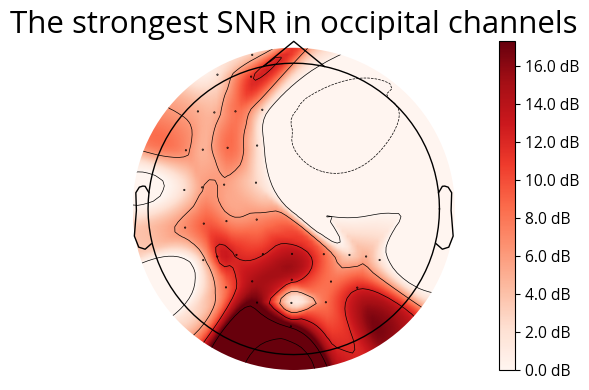

[np.float64(4.029172557196618), np.float64(2.2400762736479014), np.float64(11.695039968214257), np.float64(2.1354880525172684), np.float64(8.209536805498358), np.float64(4.917421652932336), np.float64(4.882090722896512), np.float64(6.493174921918885), np.float64(4.760766207602362), np.float64(8.469544107179415), np.float64(1.9680384920347498), np.float64(2.5825144827207556), np.float64(5.668645455147909), np.float64(5.915159436186508), np.float64(2.624023920921377), np.float64(7.055892579861621), np.float64(9.30160822622965), np.float64(7.040518549383671), np.float64(6.970904052445302), np.float64(11.814415498470403), np.float64(11.812828959531974), np.float64(12.248904620395486), np.float64(4.939831549275856), np.float64(9.04594248704358), np.float64(14.508447212003306), np.float64(16.78457176599062), np.float64(17.287311672049633), np.float64(1.2760884477553238), np.float64(13.26572313322318), np.float64(13.851556791322249), np.float64(8.758936750362473), np.float64(2.693660896419111

In [23]:
import mne

def calculate_snr(cross_corrs_all_trials, sampling_rate, expected_peak_time=None):
    snrs = []
    for channel_corrs in cross_corrs_all_trials:
        cumulative_corr = np.sum(channel_corrs, axis=0)
        # Time vector for the cross-correlation
        # time_vector = np.linspace(0, len(cumulative_corr) / sampling_rate, len(cumulative_corr))

        if expected_peak_time is not None:
            # Find the peak closest to the expected peak time
            peak_signal = np.max(cumulative_corr[int((expected_peak_time - 0.0)*sampling_rate):
                                                 int((expected_peak_time + 0.1)*sampling_rate)])
        else:
            # Find the highest peak in the cross-correlation
            print(np.max(cumulative_corr))
            peak_signal = np.max(cumulative_corr)

        # Calculate the noise as the standard deviation of the cross-correlation
        noise = np.std(cumulative_corr)  # Assuming this represents the noise
        snr = 10 * np.log10(peak_signal**2 / noise**2)
        snrs.append(snr)
    return snrs

# Plot topography
def plot_topography(snr_values, channel_labels, sampling_rate):
    info = mne.create_info(ch_names=channel_labels, sfreq=sampling_rate, ch_types='eeg')

    # Use a standard montage for electrode positions
    montage = mne.channels.make_standard_montage('biosemi64')
    info.set_montage(montage)

    # Create Evoked object with SNR values
    evoked_data = np.array(snr_values).reshape(-1, 1)
    evoked = mne.EvokedArray(evoked_data, info)

    # Plot topography
    fig, ax = plt.subplots(figsize=(colwidth, 4))
    im, cn = mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, axes=ax, show=False)
    ax.margins(0)
    cbar = fig.colorbar(im, ax=ax, format="%0.1f dB")
    cbar.ax.tick_params(labelsize=font_size/2)
    plt.subplots_adjust(left=0, right=1,
                        top=1, bottom=0
                        )
    ax.set_title('The strongest SNR in occipital channels', fontsize=font_size)
    plt.savefig('../presentations/figures/snr_topography.svg', bbox_inches='tight', pad_inches=None, transparent=True)
    plt.show()

# Example usage
expected_peak_time = 1.077 # Adjust based on where you expect the peak
snr_values = calculate_snr(cross_corrs_all_trials, sampling_rate, expected_peak_time)
plot_topography(snr_values, channel_labels, sampling_rate)

print(snr_values, channel_labels, sampling_rate)

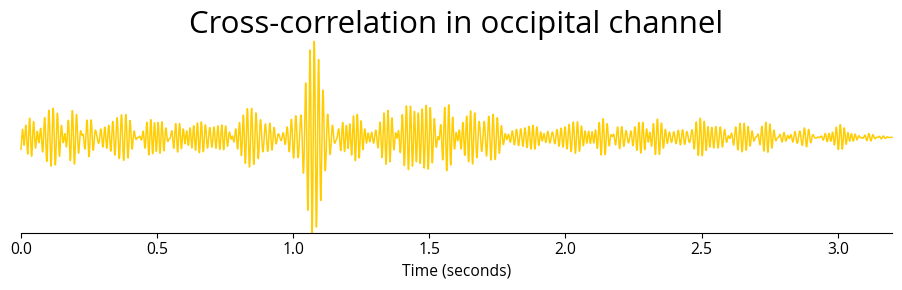

In [24]:

cross_corrs_all_trials = parallel_process_experiments(noise_experiments, channel_labels, num_channels)
golden = (1 + 5 ** 0.5) / 2

# Plot heatmaps for each channel
sampling_rate = 2048
for channel, channel_label in enumerate(channel_labels):
    if channel_label not in ['Iz']: continue # Only plot the interesting occipital channels

    fig, ax = plt.subplots(figsize=(colwidth, 3), clip_on=False)

    ax.spines[['right', 'left', 'top']].set_visible(False)
    # Plot heatmap of cross-correlations for all trials
    # plt.subplot(2, 1, 1)
    # sns.heatmap(np.array(cross_corrs_all_trials[channel]), cmap='viridis', cbar=False)
    # plt.title(f'Heatmap of Cross-Correlations for Channel {channel + 1} / {channel_labels[channel]}')
    # plt.xlabel('Lag')
    # plt.ylabel('Trial')

    # plt.subplot(2, 1, 2)
    # Calculate and plot cumulative cross-correlation
    cumulative_corr = np.sum(np.array(cross_corrs_all_trials[channel]), axis=0)
    time_vector = np.linspace(0, len(cumulative_corr) / sampling_rate, len(cumulative_corr))

    plt.plot(time_vector, cumulative_corr, color=col_gold, linewidth=linewidth/golden**3, clip_on=False)
    plt.title(f'Cross-correlation in occipital channel', fontsize=font_size)
    plt.xlabel('Time (seconds)', fontsize=font_size/2)
    plt.xticks(fontsize=font_size/2)
    # plt.ylabel('Cumulative Correlation')
    # remove y axis
    ax.yaxis.set_visible(False)
    ax.margins(0)
    plt.xlim(0, time_vector[-1])
    # plt.legend()
    plt.subplots_adjust(left=0, right=1,
                        # top=1, bottom=0
                        )

    plt.tight_layout()
    plt.savefig(f'../presentations/figures/cross_correlation_{channel_label}.svg', bbox_inches=None, pad_inches=None, transparent=True)
    plt.show()


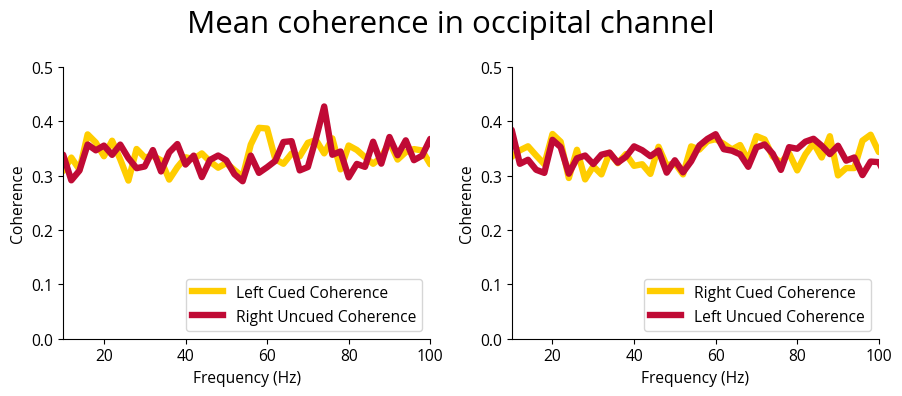

In [77]:
from collections import defaultdict
from concurrent.futures import ProcessPoolExecutor, as_completed

import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.signal import (butter, coherence, correlate, filtfilt, find_peaks,
                          resample, sosfiltfilt, welch)

def determine_coherence_per_trial(eeg_data, noise_stim_left, noise_stim_right, channel_labels, channel_selection, lags,
                                  sampling_rate=2048, noise_sample_rate=480, wiggle=0,
                                  upsample_noise=True, eeg_start_time=0.0, eeg_end_time=3.2,
                                  noise_start_time=0.0, noise_end_time=2.0,
                                  bandpass_eeg=None, bandpass_noise=None, freq_band=(50, 80)):
    num_samples, num_channels = eeg_data.shape
    eeg_segment_start = int(eeg_start_time * sampling_rate)
    eeg_segment_end = int(eeg_end_time * sampling_rate)

    # Select EEG segment
    eeg_data_segment = eeg_data[eeg_segment_start:eeg_segment_end, :].copy()

    # Select noise segment
    noise_segment_start = int(noise_start_time * noise_sample_rate)
    noise_segment_end = int(noise_end_time * noise_sample_rate)
    noise_stim_left_segment = noise_stim_left[noise_segment_start:noise_segment_end].copy()
    noise_stim_right_segment = noise_stim_right[noise_segment_start:noise_segment_end].copy()

    # Optionally bandpass filter the signals
    if bandpass_eeg:
        lowcut, highcut = bandpass_eeg
        for channel in range(num_channels):
            eeg_data_segment[:, channel] = bandpass_filter_sos(eeg_data_segment[:, channel], lowcut, highcut, sampling_rate)

    if bandpass_noise:
        lowcut, highcut = bandpass_noise
        noise_stim_left_segment = bandpass_filter_sos(noise_stim_left_segment, lowcut, highcut, noise_sample_rate)
        noise_stim_right_segment = bandpass_filter_sos(noise_stim_right_segment, lowcut, highcut, noise_sample_rate)

    # Upsample or downsample the noise signals
    if upsample_noise:
        noise_stim_left_segment = upsample_or_downsample(noise_stim_left_segment, noise_sample_rate, sampling_rate)
        noise_stim_right_segment = upsample_or_downsample(noise_stim_right_segment, noise_sample_rate, sampling_rate)
    else:
        eeg_data_segment = upsample_or_downsample(eeg_data_segment, sampling_rate, noise_sample_rate)
        sampling_rate = noise_sample_rate

    # Normalise the signals before calculating coherence
    noise_stim_left_segment = normalise_signal(noise_stim_left_segment)
    noise_stim_right_segment = normalise_signal(noise_stim_right_segment)
    eeg_data_segment = normalise_signal(eeg_data_segment)

    left_coherence = defaultdict(list)
    right_coherence = defaultdict(list)


    for channel, channel_label in enumerate(channel_labels):
        if channel_label not in channel_selection:
            continue

        base_lag = lags[channel_label]
        best_lag = base_lag
        best_coherence_sum = -np.inf

        # Check coherence sums within the wiggle room
        for delta in range(-wiggle, wiggle + 1):
            current_lag = base_lag + delta
            eeg_aligned = eeg_data_segment[:, channel][current_lag:current_lag + len(noise_stim_left_segment)]
            delay = int(sampling_rate * 1)
            f, coh_left = coherence(eeg_aligned[delay:len(eeg_aligned)], noise_stim_left_segment[delay:len(eeg_aligned)], fs=sampling_rate, nperseg=1024)
            f, coh_right = coherence(eeg_aligned[delay:len(eeg_aligned)], noise_stim_right_segment[delay:len(eeg_aligned)], fs=sampling_rate, nperseg=1024)

            freq_indices = np.where((f >= freq_band[0]) & (f <= freq_band[1]))[0]
            coh_left_band = np.mean(coh_left[freq_indices], axis=0)
            coh_right_band = np.mean(coh_right[freq_indices], axis=0)
            coherence_sum = np.sum(coh_left_band) + np.sum(coh_right_band)

            if coherence_sum > best_coherence_sum:
                best_coherence_sum = coherence_sum
                best_lag = current_lag

        # Recompute coherence with the best lag
        eeg_aligned_best = eeg_data_segment[:, channel][best_lag:best_lag + len(noise_stim_left_segment)]
        delay = int(sampling_rate * 1)
        f, coh_left_best = coherence(eeg_aligned_best[delay:len(eeg_aligned_best)], noise_stim_left_segment[delay:len(eeg_aligned_best)], fs=sampling_rate, nperseg=1024)
        f, coh_right_best = coherence(eeg_aligned_best[delay:len(eeg_aligned_best)], noise_stim_right_segment[delay:len(eeg_aligned_best)], fs=sampling_rate, nperseg=1024)

        left_coherence[channel_label].append(coh_left_best)
        right_coherence[channel_label].append(coh_right_best)

    return left_coherence, right_coherence, f

def aggregate_and_plot_coherence(experiments, channel_labels, lags, sampling_rate=2048, noise_sample_rate=480, plot_channels=None):
    aggregated_left_cued = defaultdict(list)
    aggregated_left_uncued = defaultdict(list)
    aggregated_right_cued = defaultdict(list)
    aggregated_right_uncued = defaultdict(list)
    freqs = None

    for _, experiment in experiments.iterrows():
        eeg_data = experiment['eeg']
        noise_stim_left = experiment['noise_stim_left']
        noise_stim_right = experiment['noise_stim_right']
        attended_side = experiment['attended_side']

        left_coherence, right_coherence, freqs = determine_coherence_per_trial(
            eeg_data, noise_stim_left, noise_stim_right, channel_labels, plot_channels, lags,
            sampling_rate=sampling_rate, noise_sample_rate=noise_sample_rate,
            upsample_noise=True, eeg_start_time=0.0, eeg_end_time=3.2,
            noise_start_time=0.0, noise_end_time=2.15,
        )

        if attended_side == 0:
            for channel_label in channel_labels:
                aggregated_left_cued[channel_label].append(left_coherence[channel_label])
                aggregated_right_uncued[channel_label].append(right_coherence[channel_label])
        else:
            for channel_label in channel_labels:
                aggregated_right_cued[channel_label].append(right_coherence[channel_label])
                aggregated_left_uncued[channel_label].append(left_coherence[channel_label])

    # Plot coherence
    if plot_channels is None:
        plot_channels = channel_labels

    for channel_label in plot_channels:
        mean_left_cued = np.squeeze(np.mean(aggregated_left_cued[channel_label], axis=0))
        mean_left_uncued = np.squeeze(np.mean(aggregated_left_uncued[channel_label], axis=0))
        mean_right_cued = np.squeeze(np.mean(aggregated_right_cued[channel_label], axis=0))
        mean_right_uncued = np.squeeze(np.mean(aggregated_right_uncued[channel_label], axis=0))

        std_left_cued = np.squeeze(np.std(aggregated_left_cued[channel_label], axis=0))
        std_left_uncued = np.squeeze(np.std(aggregated_left_uncued[channel_label], axis=0))
        std_right_cued = np.squeeze(np.std(aggregated_right_cued[channel_label], axis=0))
        std_right_uncued = np.squeeze(np.std(aggregated_right_uncued[channel_label], axis=0))

        fig, ax = plt.subplots(1, 2, figsize=(colwidth, 4))
        fig.suptitle(f'Mean coherence in occipital channel', fontsize=font_size)
        # Left cued and uncued plota
        # ax = plt.subplot(1, 2, 1)
        ax[0].plot(freqs, mean_left_cued, linewidth=linewidth, color=col_gold, label='Left Cued Coherence')
        # ax[0].fill_between(freqs, mean_left_cued - std_left_cued, mean_left_cued + std_left_cued, color=col_gold, alpha=0.2)
        ax[0].plot(freqs, mean_right_uncued, linewidth=linewidth, color=col_red, label='Right Uncued Coherence')
        # ax[0].fill_between(freqs, mean_right_uncued - std_right_uncued, mean_right_uncued + std_right_uncued, color=col_red, alpha=0.2)
        # ax[0].title(f'Coherence for Channel {channel_label} - Left Cued')
        # set label
        # ax[0].xlabel('Frequency (Hz)')
        # ax[0].ylabel('Coherence')
        ax[0].spines[['right', 'top']].set_visible(False)
        ax[0].legend(loc='lower right', fontsize=font_size/2)
        ax[0].set_ylim(0, .5)
        ax[0].set_xlim(10, 100)
        ax[0].set_xlabel('Frequency (Hz)', fontsize=font_size/2)
        ax[0].set_ylabel('Coherence', fontsize=font_size/2)
        ax[0].xaxis.set_tick_params(labelsize=font_size/2)
        ax[0].yaxis.set_tick_params(labelsize=font_size/2)
        # Right cued and uncued plot
        plt.plot(freqs, mean_right_cued, linewidth=linewidth, color=col_gold, label='Right Cued Coherence')
        # plt.fill_between(freqs, mean_right_cued - std_right_cued, mean_right_cued + std_right_cued, color=col_gold, alpha=0.2)
        plt.plot(freqs, mean_left_uncued, linewidth=linewidth, color=col_red, label='Left Uncued Coherence')
        # plt.fill_between(freqs, mean_left_uncued - std_left_uncued, mean_left_uncued + std_left_uncued, color=col_red, alpha=0.2)
        # plt.title(f'Coherence for Channel {channel_label} - Right Cued')

        ax[1].spines[['right', 'top']].set_visible(False)
        ax[1].legend(loc='lower right', fontsize=font_size/2)
        ax[1].set_ylim(0, .5)
        ax[1].set_xlim(10, 100)
        ax[1].set_xlabel('Frequency (Hz)', fontsize=font_size/2)
        ax[1].set_ylabel('Coherence', fontsize=font_size/2)
        ax[1].xaxis.set_tick_params(labelsize=font_size/2)
        ax[1].yaxis.set_tick_params(labelsize=font_size/2)

        plt.subplots_adjust(left=0, right=1)
        plt.tight_layout()
        plt.savefig(f'../presentations/figures/avg_coherence.svg', bbox_inches=None, pad_inches=None, transparent=True)
        plt.show()

# Example usage
noise_experiments = experiment_data[experiment_data['has_noise']]
lags = {}
for channel_corrs, channel_label in zip(cross_corrs_all_trials, channel_labels):
    cumulative_corr = np.sum(channel_corrs, axis=0)
    lag = np.argmax(cumulative_corr)
    lags[channel_label] = lag
aggregate_and_plot_coherence(noise_experiments, channel_labels, lags, plot_channels=['Iz'])

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import svgwrite
from svgwrite import cm, mm

def create_vector_gabor_patch(size=256, frequency=10, theta=0, sigma=20, phase=0, filename='vector_gabor_patch.svg'):
    """
    Generate and save a vector Gabor patch as an SVG file.
    
    Parameters:
        size (int): Size of the patch (size x size).
        frequency (float): Frequency of the sinusoidal grating.
        theta (float): Orientation of the grating in degrees.
        sigma (float): Standard deviation of the Gaussian envelope.
        phase (float): Phase offset of the sinusoidal grating.
        filename (str): Filename to save the SVG file.
    """
    # Calculate parameters
    theta_rad = np.deg2rad(theta)
    half_size = size / 2

    # Create SVG drawing
    dwg = svgwrite.Drawing(filename, profile='tiny', size=(size * mm, size * mm))
    
    # Define the grid
    x = np.linspace(-half_size, half_size, size)
    y = np.linspace(-half_size, half_size, size)
    X, Y = np.meshgrid(x, y)

    # Rotate the grid
    X_theta = X * np.cos(theta_rad) + Y * np.sin(theta_rad)

    # Create the Gabor function (without the Gaussian envelope for vector representation)
    gabor = np.sin(2 * np.pi * frequency * X_theta + phase)

    # Normalize to range [0, 1]
    gabor_normalized = (gabor - gabor.min()) / (gabor.max() - gabor.min())

    # Draw Gabor lines
    for i in range(size):
        for j in range(size - 1):
            # Calculate line intensity and color
            intensity = gabor_normalized[i, j]
            color = svgwrite.rgb(255 * intensity, 255 * intensity, 255 * intensity, '%')
            dwg.add(dwg.line(
                start=(j * mm, i * mm),
                end=((j + 1) * mm, i * mm),
                stroke=color
            ))

    # Save SVG file
    dwg.save()
# Generate and save the Gabor patch
create_vector_gabor_patch(size=256, frequency=10, theta=45, sigma=30, phase=0, filename='../presentations/figures/gabor_patch.svg')

ModuleNotFoundError: No module named 'svgwrite'